#### Project 1: Image Transformation App

In [23]:
# Import libraries.
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import random
from datetime import datetime
import re


# Function to validate age.
def validate_age(dob_str):
    try:
        dob = datetime.strptime(dob_str, '%Y-%m-%d')
        age = datetime.now().year - dob.year
        return age >= 18
    except ValueError:
        return False


# Function to validate email.
def validate_email(email):
    # Regular expression for email validation
    pattern = r'^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$'
    return re.match(pattern, email)


# Function for user sign up.
def sign_up():
    print("\n=== SIGN UP ===")
    while True:
        # Collect user's email and dob.
        email = input("\nEnter your email or 'quit' to return to the main menu: ")
        if email.lower() == 'quit':
            print("\nReturning to the authentication page...")
            break
        else:
            if validate_email(email):
                break
            else:
                print("\nInvalid email address. Please try again.")

    dob_str = input("Enter your date of birth (YYYY-MM-DD):")
    if validate_age(dob_str):
        # Save user's credentials to a file.
        with open("database/credentials/visitor_credentials.txt", "a") as file:
            file.write(f"{email},{dob_str}\n")

        print("\nSign up successful!")
        return True
    else:
        print("\nPeople below 18 years are not permitted to use this application.")
        print("\nReturning to the main menu...")
        return False


# Function for user login.
def sign_in():
    print("\n=== SIGN IN ===")
    # Load existing user credentials from file.
    database = []
    with open("database/credentials/visitor_credentials.txt", "r") as file:
        for line in file:
            email, _ = line.strip().split(",")
            database.append(email)

    while True:
        # Request email from the user.
        email = input("\nEnter your email or 'quit' to exit: ")
        if email.lower() == 'quit':
            print("\nExiting login process...")
            return False

        # Check if email is in database.
        if email in database:
            print("\nLogin successful!")
            return email
        else:
            print("\nEmail not recognised, please sign up.")




In [29]:
def choice_verification(choice, first, last, rand):
    if choice.isdigit() and (first <= int(choice) <= last):
        choice = int(choice)
        if choice == rand:
            choice = random.choice(list(range(first, rand)))
            return choice
        else:
            return choice
    else:
        print(f"Invalid choice. Please enter a number between {first} and {last}:")
        return None


def authentication_page():
    print("\n=== AUTHENTICATION PAGE ===")
    print("1. Sign up")
    print("2. Sign in")
    print("3. Quit")
    choice = input("Enter your choice: ")
    return choice


def collection_page(choice):
    print("\n=== COLLECTIONS PAGE ===")
    print("1. Traditional Art")
    print("2. Modern Art")
    print("3. Contemporary Art")
    print("4. Randomly select")
    print("5. Log out")
    
    while True:
        choice = input("Enter your choice: ")
        choice = choice_verification(choice, 1, 5, 4)
        if choice:
            return choice


def traditional():
    print("\n=== TRADITIONAL ART ===")
    print("1. Benin King Bust")
    print("2. Benin Queen Bust")
    print("3. Igbo-Ukwu Art")
    print("4. Female Nok Head")
    print("5. Male Nok Head")
    print("6. Randomly select")
    
    while True:
        choice = input("Enter your choice: ")
        choice = choice_verification(choice, 1, 6, 6)
        if choice:
            return choice


def contemporary():
    print("\n=== MODERN ART ===")
    print("1. Durbar: David Dale [1999]")
    print("2. In the Country: David Dale[1997]")
    print("3. Fulani Dancers Part: Lara Ige [1994]")
    print("4. The Evening for Milkmaids: Lara Ige [1991]")
    print("5. Home Bond: Hamid Ibrahim [1995]")
    print("6. Randomly select")
    
    while True:
        choice = input("Enter your choice: ")
        choice = choice_verification(choice, 1, 6, 6)
        if choice:
            return choice


def modern():
    print("\n=== MODERN ART ===")
    print("1. Fulani Herdsmen: Victor Epuk [1997]")
    print("2. Tales By Moonlight: Victor Epuk [1997]")
    print("3. Panel of 5: Bruce Onobrakpeya [1987]")
    print("4. Landscape from the North: Kolade Oshinowo [2003]")
    print("5. Red Sky: David Dale [1975]")
    print("6. Randomly select")
    
    while True:
        choice = input("Enter your choice: ")
        choice = choice_verification(choice, 1, 6, 6)
        if choice:
            return choice



def transformation_page():
    print("\n=== TRANSFORMATION PAGE ===")
    print("\nWhat tranformation technique would you like to carry out on your image?")
    print("1. Translation")
    print("2. Reflection")
    print("3. Rotation")
    print("4. Scaling")
    print("5. Cropping")
    print("6. Shearing")
    print("7. Blurring")
    print("8. View Image")
    print("9. Change image")
    choice = input("Enter your choice: ")
    return choice


# Function for displaying images.
def display(position, title, image):
    plt.subplot(1, 2, position)
    plt.title(title)
    plt.imshow(image)
    plt.show()


# Function for visualisation of colors.
def translation(image):
    print('\n=== IMAGE TRANSLATION ===')
    rows, cols = image.shape

    # Plot the original image
    display(1, "Original", image)
    
    M = np.float32([[1, 0, 100], [0, 1, 50]])
    translated_image = cv2.warpAffine(image, M, (cols, rows))
    
    # Plot the translated image
    display(2, "Translated Image", translated_image)

    # cv2.imshow('img', translated_image)
    # cv2.imwrite('output/translated_image.jpg', translated_image)
    # cv2.destroyAllWindows()
    

# Function for arithmetic operations.
def reflection(image):
    print('\n=== IMAGE REFLECTION ===')
    
    # Plot the original image
    display(1, "Original", image)
    
    rows, cols = image.shape
    M = np.float32([[1, 0, 0], [0, -1, rows], [0, 0, 1]])
    reflected_image = cv2.warpPerspective(image, M, (int(cols), int(rows)))
    
    # Plot the translated image
    display(2, "Reflected Image", reflected_image)

    # cv2.imshow('img', reflected_image)
    # cv2.imwrite('output/refelcted_image.jpg', reflected_image)
    # cv2.destroyAllWindows()
    

# Function for adjusting contrast and brightness.
def rotation(image):
    print('\n=== IMAGE ROTATION ===')
    rows, cols = image.shape

    # Plot the original image.
    display(1, "Original", image)
    
    rotated_image = cv2.warpAffine(image, cv2.getRotationMatrix2D((cols/2, rows/2), 30, 0.6), (cols, rows))
    
    # Plot the rotated image.
    display(2, "Rotated Image", rotated_image)
    
    # cv2.imshow('img', rotated_image)
    # cv2.imwrite('output/rotated_image.jpg', rotated_image)
    # cv2.destroyAllWindows()


# Function for image sharpening.
def scaling(image):
    print('\n=== IMAGE SCALING ===')
    pass


# Function for removing noise.
def cropping(image):
    print('\n=== IMAGE CROPPING ===')
    pass

# Function for image scaling.
def shearing(image):
    print('\n=== IMAGE SHEARING ===')
    pass


# Function for inverse transformation.
def blurring(image):
    print('\n=== IMAGE BLURRING ===')
    pass


# Function for image viewer.
def view(image):
    print('\n=== IMAGE VIEWER ===')
    display(1, "ARTWORK", image)
    return True


# Function to perform image transformation based on user's choice.
def transform_image(image, transformation_choice):
    transformations = {
        "1": translation,
        "2": reflection,
        "3": rotation,
        "4": scaling,
        "5": cropping,
        "6": shearing,
        "7": blurring,
        "8": view
    }

    # Check if enhancement_choice is valid
    print("WHERE IS THE BUG?")
    if transformation_choice in transformations:
        transformations[transformation_choice](image)
    else:
        print("Invalid transformation choice.")



Welcome to the Image Transformation Application!

=== AUTHENTICATION PAGE ===
1. Sign up
2. Sign in
3. Quit


Enter your choice:  2



=== SIGN IN ===



Enter your email or 'quit' to exit:  dmoru@pau.edu.ng



Login successful!

=== COLLECTIONS PAGE ===
1. Traditional Art
2. Modern Art
3. Contemporary Art
4. Randomly select
5. Log out


Enter your choice:  4



=== MODERN ART ===
1. Fulani Herdsmen: Victor Epuk [1997]
2. Tales By Moonlight: Victor Epuk [1997]
3. Panel of 5: Bruce Onobrakpeya [1987]
4. Landscape from the North: Kolade Oshinowo [2003]
5. Red Sky: David Dale [1975]
6. Randomly select


Enter your choice:  6



=== TRANSFORMATION PAGE ===

What tranformation technique would you like to carry out on your image?
1. Translation
2. Reflection
3. Rotation
4. Scaling
5. Cropping
6. Shearing
7. Blurring
8. View Image
9. Change image


Enter your choice:  3


WHERE IS THE BUG?

=== IMAGE ROTATION ===


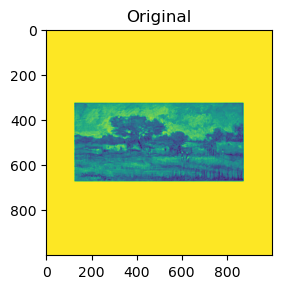

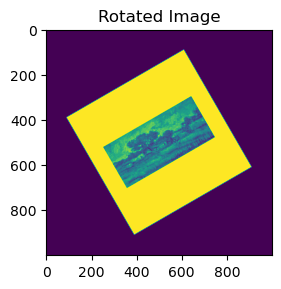


=== TRANSFORMATION PAGE ===

What tranformation technique would you like to carry out on your image?
1. Translation
2. Reflection
3. Rotation
4. Scaling
5. Cropping
6. Shearing
7. Blurring
8. View Image
9. Change image


Enter your choice:  9



Logging you out...




=== COLLECTIONS PAGE ===
1. Traditional Art
2. Modern Art
3. Contemporary Art
4. Randomly select
5. Log out


Enter your choice:  5



Logging you out...

=== AUTHENTICATION PAGE ===
1. Sign up
2. Sign in
3. Quit


Enter your choice:  3



Exiting the Image Transformation Application...


In [30]:
# Main function to execute the application
def main():
    print("Welcome to the Image Transformation Application!")
    
    while True:
        choice = authentication_page()
        if choice == "1":
            sign_up()
        elif choice == "2":
            email = sign_in()
            if email:
                while True:
                    # Select a collection
                    collection = ['traditional','modern','contemporary']
                    choice = int(collection_page(choice)) - 1
                    if choice < 3:
                        chosen = collection[choice]
                    else:
                        print("\nLogging you out...")
                        break

                    # Select an image from the chosen collection.
                    if choice == 0:
                        image = traditional()
                    elif choice == 1:
                        image = modern()
                    elif choice == 2:
                        image = contemporary()
                        

                    # Get the image path.
                    image_path = f"/Users/chudi/Documents/study/school/final/csc418/github-repo/cofomacsc418/week-3/database/collections/{chosen}/{image}.jpg"

                    # Inner loop to carry out various transformation techniques on the same image.
                    while True:
                        # Get transformation technique
                        transformation_choice = transformation_page()
                        
                        # Check if the input is a valid choice (a number between 1 and 9)
                        if transformation_choice.isdigit() and 1 <= int(transformation_choice) <= 9:
                            if transformation_choice == "9":
                                print('\nLogging you out...\n\n\n')
                                break
                            else:
                                # Perform selected enhancement on the user's image
                                if os.path.exists(image_path):
                                    img = cv2.imread(image_path, 0)
                                    transform_image(img, transformation_choice)
                                else:
                                    print("Image not found.")
                        else:
                            print("\nInvalid choice. Please enter a number between 1 and 9:")
        elif choice == "3":
            print("\nExiting the Image Transformation Application...")
            break
        else:
            print("\nInvalid choice. Please try again.")


# Execute the main function
if __name__ == "__main__":
    main()
